## 1. Data Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
import matplotlib.pyplot as plt

In [20]:
sns.set_style("whitegrid")

In [2]:
dff = pd.read_csv('loan_timing.csv')

In [3]:
dff.head()

,days since origination,days from origination to chargeoff
0,109,NaN
1,679,NaN
2,723,NaN
3,509,NaN
4,254,NaN


**Terms Used:**

`Origination:` The event in which the borrower receives the funds. 

`Charge-off:` This event in which case the borrower stops making payments, typically due to financial  hardship, before the end of the 3-year term, is called  `charge-off`, and the loan is then said to have charged off.

## 2. Data Inspection

In [7]:
dff.shape

(50000, 2)

In [5]:
dff.isnull().sum()

days since origination                    0
days from origination to chargeoff    46695
dtype: int64

**Note:** Almost 90% of the observations for the feature `days from origination to chargeoff` are null. 

In [33]:
dff.describe()

,days since origination,days from origination to chargeoff
count,50000.000000,3305.000000
mean,365.844760,214.852345
std,210.965114,165.233874
min,0.000000,0.000000
25%,183.000000,76.000000
50%,366.000000,180.000000
75%,549.000000,323.000000
max,730.000000,725.000000


## 3. EDA

(array([796., 630., 486., 397., 336., 243., 192., 125.,  75.,  25.]),
 array([  0. ,  72.5, 145. , 217.5, 290. , 362.5, 435. , 507.5, 580. ,
        652.5, 725. ]),
 <a list of 10 Patch objects>)

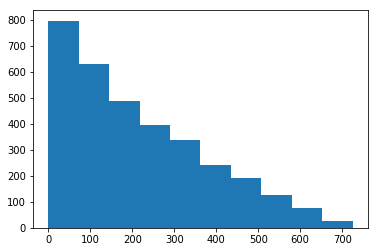

In [15]:
plt.hist(dff[dff['days from origination to chargeoff'].notnull()]['days from origination to chargeoff'])

**Interpretation:** From the above graph, it is evident that the data has a step-wise trend and is skewed to the right.

To elimate the binning bias, I use a violin-plot to explore the data further.

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


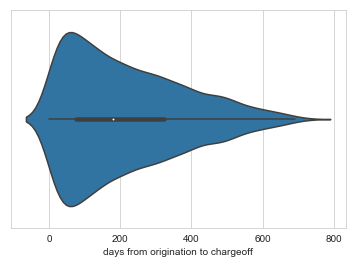

In [23]:
sns.violinplot(x = dff["days from origination to chargeoff"])

**Interpretation:** Data is densly concetrated between 0-100 and gradually decreases beyond 100. 

Text(0,0.5,'days from origination to chargeoff')

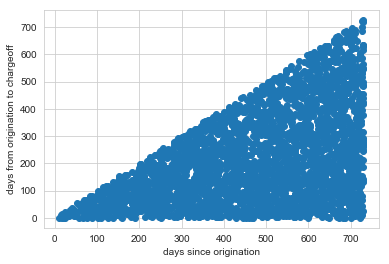

In [32]:
plt.scatter(dff['days since origination'], dff['days from origination to chargeoff'])
plt.xlabel('days since origination')
plt.ylabel('days from origination to chargeoff')

**Interpretation:** It is evident that there exists a positive linear relationship between the two variables.

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


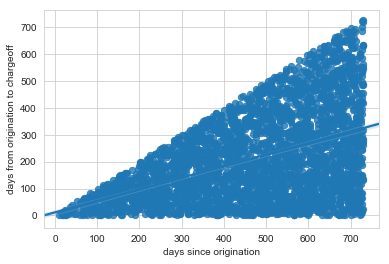

In [34]:
sns.regplot(y="days from origination to chargeoff", x="days since origination", data=dff, fit_reg = True, scatter_kws={'s':40})

In [122]:
dff.corr()

,days since origination,days from origination to chargeoff
days since origination,1.00000,0.45892
days from origination to chargeoff,0.45892,1.00000


In [27]:
dff[dff['days from origination to chargeoff'].notnull()].head()

,days since origination,days from origination to chargeoff
14,327,78.0
15,400,390.0
16,721,362.0
26,410,48.0
61,649,412.0


## 4. Machine Learning

In [52]:
dfff = dff.copy(deep = True)

In [56]:
dfff = dfff.fillna(0)

In [57]:
dfff.isnull().sum()

days since origination                0
days from origination to chargeoff    0
dtype: int64

**TOWARDS DS**:

In [124]:
from sklearn.model_selection import train_test_split

**1. dff.fillna(0)**

In [127]:
X_train, X_test, y_train, y_test = train_test_split(dfff[['days since origination']], dfff[['days from origination to chargeoff']], test_size = 0.4, random_state = 101)

In [128]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [129]:
predictions = lm.predict(X_test)

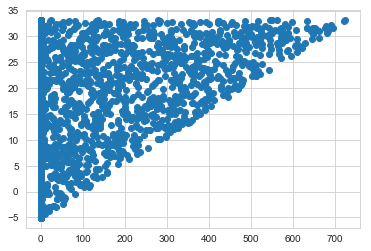

In [130]:
plt.scatter(y_test,predictions)

**2.dfff[['days from origination to chargeoff']]:**

In [131]:
new_df = dff[dff['days from origination to chargeoff'].notnull()]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(new_df[['days since origination']], new_df[['days from origination to chargeoff']], test_size = 0.25, random_state = 101)

In [134]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [135]:
predictions = lm.predict(X_test)

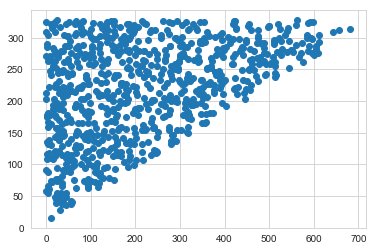

In [136]:
plt.scatter(y_test,predictions)

**STATSMODEL**

In [96]:
import statsmodels.api as sm

In [107]:
source = dfff[['days since origination']]
target = dfff[['days from origination to chargeoff']]

In [108]:
X = source.copy(deep = True)
y = target.copy(deep = True)

In [111]:
# Without a constant
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     days from origination to chargeoff   R-squared:                       0.067
Model:                                            OLS   Adj. R-squared:                  0.067
Method:                                 Least Squares   F-statistic:                     3595.
Date:                                Tue, 26 Feb 2019   Prob (F-statistic):               0.00
Time:                                        06:55:46   Log-Likelihood:            -2.8141e+05
No. Observations:                               50000   AIC:                         5.628e+05
Df Residuals:                                   49999   BIC:                         5.628e+05
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
days since origination     0.0427      0.001     59.955      0.000       0.041       0.044
==============================================================================
Omnibus:                    53412.505   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2850748.040
Skew:                           5.644   Prob(JB):                         0.00
Kurtosis:                      38.227   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interprtation:** 
- The coefficient of 0.0427 means that as the `days since origination` variable increases by 1, the predicted value of MDEV increases by 0.0427. 
- There is a 95% confidence intervals for the `days since origination` (meaning we predict at a 95% percent confidence that the value of RM is between 0.041 to 0.044).

In [112]:
# Adding a constant (intercept) to our model
X = sm.add_constant(X)

In [113]:
# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     days from origination to chargeoff   R-squared:                       0.028
Model:                                            OLS   Adj. R-squared:                  0.028
Method:                                 Least Squares   F-statistic:                     1462.
Date:                                Tue, 26 Feb 2019   Prob (F-statistic):          3.09e-315
Time:                                        07:09:05   Log-Likelihood:            -2.8136e+05
No. Observations:                               50000   AIC:                         5.627e+05
Df Residuals:                                   49998   BIC:                         5.627e+05
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -5.7359      0.602     -9.528      0.000      -6.916      -4.556
days since origination     0.0545      0.001     38.231      0.000       0.052       0.057
==============================================================================
Omnibus:                    52796.443   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2722802.359
Skew:                           5.546   Prob(JB):                         0.00
Kurtosis:                      37.408   Cond. No.                         845.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation:** With the constant term the coefficients are different. Without a constant we are forcing our model to go through the origin, but now we have a y-intercept at -5.7359. We also changed the slope of the RM predictor from 0.0427 to 0.0545.

**SKLearn:**

In [114]:
from sklearn import linear_model

In [115]:
X = source.copy(deep = True)

In [116]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [117]:
predictions = lm.predict(X)
print(predictions)[0:5]

[[ 0.20432277]
 [31.26794198]
 [33.66583539]
 ...
 [ 5.65408053]
 [ 5.92656842]
 [-5.6814156 ]]


TypeError: 'NoneType' object is not subscriptable

In [118]:
lm.score(X,y)

0.02840317023051353

In [119]:
lm.coef_

array([[0.05449758]])

In [120]:
lm.intercept_

array([-5.73591318])

**SPRINGBOARD**

In [58]:
import sklearn

In [63]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    dfff['days since origination'], dfff['days from origination to chargeoff'])

In [ ]:
test_size=0.33, random_state = 5

In [64]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(37500,)
(12500,)
(37500,)
(12500,)


In [65]:
X_train.values

array([721, 656, 393, ..., 670, 222, 679], dtype=int64)

In [41]:
from sklearn import linear_model
from sklearn import datasets

In [66]:
regg = linear_model.LinearRegression()

In [67]:
reggfit = regg.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

In [69]:
y_pred_train = reggfit.predict(X_test.values.reshape(-1, 1))
y_pred_test = reggfit.predict(X_train.values.reshape(-1, 1))

In [71]:
print('Coeff: ', regg.coef_)
print('Variance score: %.2f' % regg.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1)))

Coeff:  [[0.05292212]]
Variance score: 0.03


In [73]:
from sklearn.model_selection import cross_val_score

In [76]:
# Now measure its performance with the test data with single subset
print ('Single subset performance: ' , regg.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))) 

Single subset performance:  0.031131912898098354


In [79]:
# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(reggfit, dfff['days since origination'].values.reshape(-1,1), dfff['days from origination to chargeoff'].values.reshape(-1,1), cv = 4)

In [80]:
# Print the accuracy for each fold:
print ('Accuracies of 4 folds: ' , scores)

# And the mean accuracy of all 4 folds:
print ('Mean accuracy of 4 folds: ' , scores.mean())

Accuracies of 4 folds:  [0.03021944 0.03026458 0.0267708  0.02547459]
Mean accuracy of 4 folds:  0.02818235194093413


In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
dfff['days since origination'], dfff['days from origination to chargeoff']

In [83]:
kf = KFold(n_splits = 4, random_state = 5, shuffle = True)
mse = []

In [89]:
X_train, X_test = dfff['days since origination'].iloc[train_index], dfff['days since origination'].iloc[test_index]

In [93]:
dfff['days since origination'].iloc[train_index].values.reshape(-1, 1)

array([[109],
       [679],
       [509],
       ...,
       [209],
       [214],
       [  1]], dtype=int64)

In [94]:
for train_index, test_index in kf.split(dfff['days since origination']):
    X_train, X_test = dfff['days since origination'].iloc[train_index].values.reshape(-1, 1), dfff['days since origination'].iloc[test_index].values.reshape(-1, 1)
    y_train, y_test = dfff['days from origination to chargeoff'][train_index].values.reshape(-1, 1), dfff['days from origination to chargeoff'][test_index].values.reshape(-1, 1)
    lm.fit(X_train, y_train)
    mse.append(np.mean((y_test - lm.predict(X_test))**2))


In [95]:
print ('The prediction errors for K=4 groups: {}'.format(mse))
print ('Average prediction error: {}'.format(np.mean(mse)))

The prediction errors for K=4 groups: [4291.4790979094, 4467.794811551774, 4625.653636941194, 4702.709123659852]
Average prediction error: 4521.909167515554


**Summary:** The K-Fold cross-validation yields an average prediction error that is smaller than the simple train-test split used previously. Multiple rounds of cross-validation performed on different partitions help limit the problem of overfitting a particular training subset and thus reduce variability of the model.

**Next Steps:** 
- Gradient Descent
- Regularization